# MSDM5003 Assignment2
__name:__ LIU Jingting

__student ID:__ 21128685

# 0. Import the dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. Setting up hyperparameters
In the beginning of code, set $\gamma = 1$ and $k_{B}T=1$, as indicated in the assignment. Set the length of each time step to be 0.01, transient time interval to be 1,000 and stationary time interval to be 10,000.

In [2]:
gamma = 1.0  
kBT = 1.0  
dt = 0.01     # time interval
T_transient = 200      # time for transient run
T_total = 2000        # time for stationary run
N = int(T_total // dt)     # num of timesteps

Use an array to store the trajectory, with initial position set to 0.

In [3]:
x = np.zeros(N)  # position array, x[0]=0

# 2. Simulating the trajectory
Then simulate the motion of particle as time elapses. There are 220,000 timesteps in total, with the former 20,000 being the transient run.

In [4]:
for i in range(1, N):
    zeta = np.random.normal(0, np.sqrt(2 * gamma * kBT * dt))   # generate random noise
    x[i] = x[i-1] - gamma * x[i-1] * dt + zeta     # motion equation

Since we're seeking the long-term behavior of particles, we slice the array and only look at the stationary part. We can also check the range of trajectory coordinates using `np.max()` and `np.min()`.

In [5]:
x_stationary = x[int(T_transient // dt):]
min(x_stationary), max(x_stationary)

(-3.778977983612223, 4.052636542087124)

# 3. Data visualization
The trajectory of the particle can be plotted using the following code. Plots are stored in the 'plots' directory.

In [6]:
if not os.path.exists('./plots'):
    print('mkdir')
    os.makedirs('./plots')

The trajectory of a single particle can be visualized as follows. Plot on the left of red dashed line represents the transient period, while right side represents the stationary period.

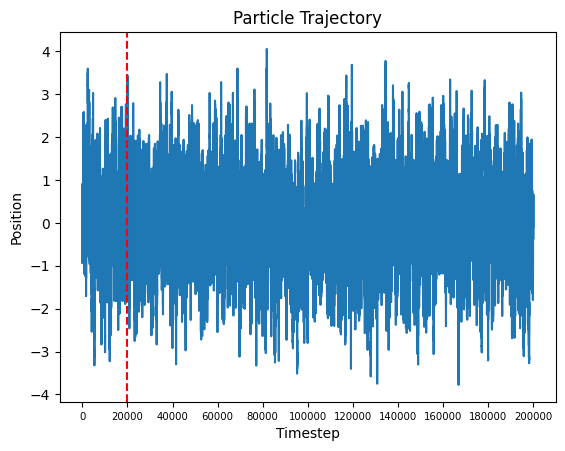

In [7]:
plt.figure()
plt.plot(np.arange(int((T_total) // dt)), x)
# plt.ylim(np.min(x_stationary) - 1, np.max(x_stationary) + 1)
plt.xticks(range(0, 200001, 20000),fontsize=7.3)  
plt.axvline(x=20000, color='r', linestyle='--')
plt.xlabel('Timestep')
plt.ylabel('Position')
plt.title('Particle Trajectory')
plt.savefig("plots/trajectory.png")
plt.show()

We use histogram to plot the pdf of our simulation result, then we sample 10,000 x-values in the range of positions during the simulation and compute their corresponding probability densities. Plotting the points forms the curvue of our theoretical normal distribution, we can compare it with our simulation plot and check whether they match.

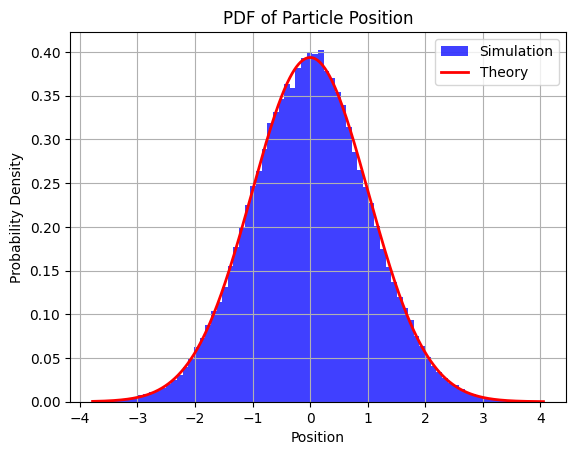

In [8]:
mean = np.mean(x_stationary)           # mean
variance = np.var(x_stationary)        # variance
x_values = np.linspace(min(x_stationary), max(x_stationary), 10000)     # x coordinate of samples
normal_pdf = (1 / np.sqrt(2 * np.pi * variance)) * np.exp(- (x_values - mean) ** 2 / (2 * variance))

plt.figure()
plt.hist(x_stationary, bins=80, density=True, alpha=0.75, color='b', label='Simulation')   # simulation pdf
plt.plot(x_values, normal_pdf, 'r', lw=2, label='Theory')    # theoretical pdf
plt.legend()
plt.grid()
plt.xlabel('Position')
plt.ylabel('Probability Density')
plt.title('PDF of Particle Position')
plt.savefig("plots/pdf.png")
plt.show()

Mean and variance of our simulated position sequence can be printed out so that we can compare them with theoretical values. Here the mean and variance are very close to theoratical values, which is $\mu = 0$ and $\sigma^{2}=1$.

In [9]:
mean, variance

(-0.00031200455987582246, 1.0266073183625268)